In [1]:
const dict = Dict{Char,Array{Int}}()
dict['0']=[0,1,1,1,1,1,1]
dict['1']=[0,1,0,0,0,0,1]
dict['2']=[1,1,1,0,1,1,0]
dict['3']=[1,1,1,0,0,1,1]
dict['4']=[1,1,0,1,0,0,1]
dict['5']=[1,0,1,1,0,1,1]
dict['6']=[1,0,1,1,1,1,1]
dict['7']=[0,1,1,0,0,0,1]
dict['8']=[1,1,1,1,1,1,1]
dict['9']=[1,1,1,1,0,1,1]
dict['a']=[1,1,1,1,1,0,1]
dict['b']=[1,0,0,1,1,1,1]
dict['c']=[0,0,1,1,1,1,0]
dict['d']=[1,1,0,0,1,1,1]
dict['e']=[1,0,1,1,1,1,0]
dict['f']=[1,0,1,1,1,0,0]
dict['t']=[0,0,0,0,1,1,1]

const dirseq = ['r','u','l','d','d','r','u'];

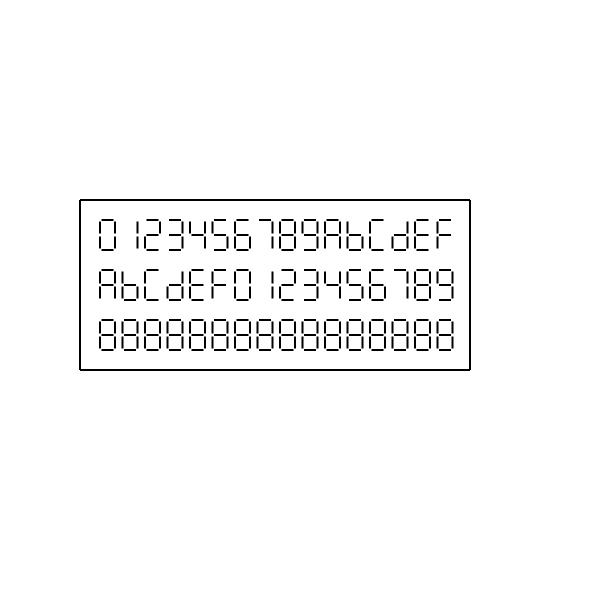

In [2]:
using Luxor

function relativemove(t,x,y)
    Penup(t)
    Turn(t,-90)
    Forward(t,y)
    Turn(t,90)
    Forward(t,x)
end

function segment(t,dir,seglength,trace)
    backdir = 0
    if dir == 'd'
        backdir = -90
        Turn(t,90)
    elseif dir == 'l'
        backdir = 180
        Turn(t,180)
    elseif dir == 'u'
        backdir = 90
        Turn(t,-90)
    end
    Penup(t)
    if trace == 1
        Forward(t,seglength/10)
        Pendown(t)
        Forward(t,8*seglength/10)
        Penup(t)
        Forward(t,seglength/10)
    else
        Forward(t,seglength)
    end
    Turn(t,backdir)
end

function dispchar(t,hexchar,seglen,spacing)
    sequence = dict[hexchar]
    for ii = 1:7
        segment(t,dirseq[ii],seglen,sequence[ii])
    end
    Forward(t,spacing)
end
    

function lcd_disp(t::Turtle,word64::String,lowleftpt::Point,height::Number)
    seglength = height/2
    spacing = height/4
    cc = 0
    relativemove(t,lowleftpt.x,lowleftpt.y+seglength)
    for thischar in word64
        dispchar(t,lowercase(thischar),seglength,spacing)
        cc += 1
    end
    relativemove(t,-lowleftpt.x-cc*(seglength+spacing),-lowleftpt.y-seglength)
end

@svg begin
    t = Turtle()
    lcd_disp(t,"0123456789ABCDEF",Point(-200,50),30)
    lcd_disp(t,"abcdef0123456789",Point(-200,0),30)
    lcd_disp(t,"8888888888888888",Point(-200,-50),30)
    Penup(t)
    Turn(t,-90)
    Forward(t,100)
    Turn(t,90)
    Pendown(t)
    Forward(t,170)
    Turn(t,90)
    Forward(t,170)
    Turn(t,90)
    Forward(t,390)
    Turn(t,90)
    Forward(t,170)
    Turn(t,90)
    Forward(t,240)
    Turn(t,90)
end